In [1]:
#building a model for predicting loan applications

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [3]:
#loading the dataset
df=pd.read_csv('C://Users/sojore/Documents/loan application data/df1_loan.csv')
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [4]:
#exploring the dataset
df.shape

(500, 15)

In [5]:
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [6]:
#handling missing data
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
#i will simply be dropping all the nans values
df1=df.dropna()
df1.isna().any()

Unnamed: 0           False
Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
Total_Income         False
dtype: bool

In [8]:
df1.shape

(390, 15)

In [9]:
df1.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,$9613.0


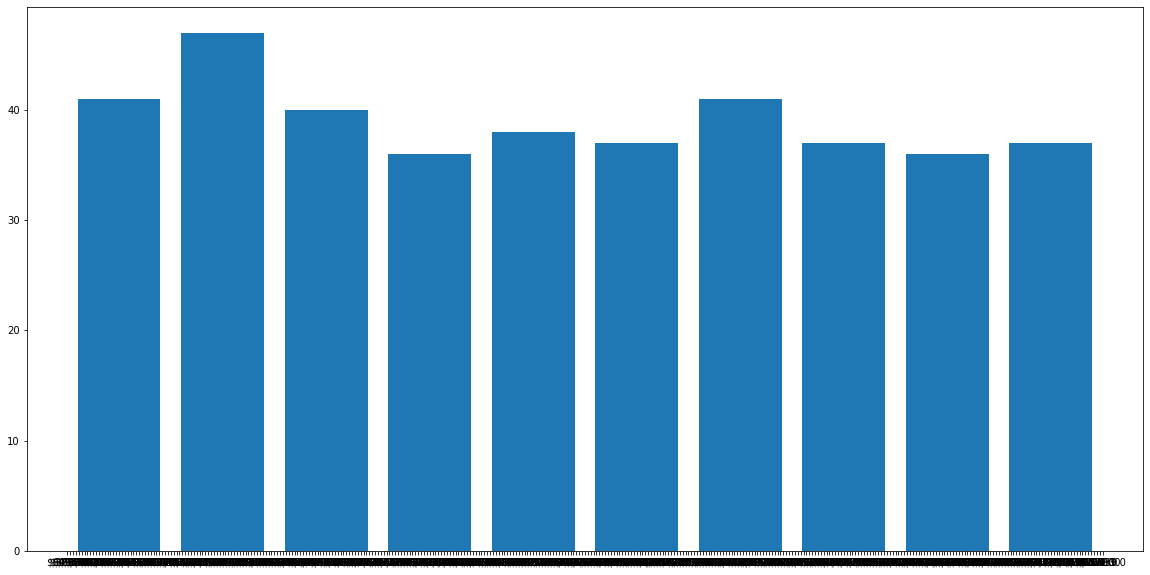

In [10]:
#handling outliers
plt.hist(df1.Total_Income,rwidth=0.8)
plt.show()

In [11]:
df1.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

In [12]:
def get_income(x):
    y=str(x)
    res=y.split('$')
    if len(res)>0:
        try:
            return float(res[0]+res[1])
        except:
            return None
t=get_income('$6000.0')
print(t)

6000.0


In [13]:
df1.Total_Income=df1.Total_Income.apply(get_income)
df1.Total_Income.isna().sum()
df1.head()

C:\Users\sojore\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [14]:
df1.Total_Income=pd.to_numeric(df1.Total_Income).astype('float64')
df1['total_income_per_loan_amt']=df1['Total_Income']/df1['LoanAmount']
df1.head()

C:\Users\sojore\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-14-1ad0cda37811>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_income_per_loan_amt']=df1['Total_Income']/df1['LoanAmount']


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,total_income_per_loan_amt
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,47.585938
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,45.454545
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,41.175000
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,42.553191
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,36.003745


In [15]:
df1.dtypes

Unnamed: 0                     int64
Loan_ID                       object
Gender                        object
Married                       object
Dependents                    object
Education                     object
Self_Employed                 object
ApplicantIncome                int64
CoapplicantIncome            float64
LoanAmount                   float64
Loan_Amount_Term             float64
Credit_History               float64
Property_Area                 object
Loan_Status                   object
Total_Income                 float64
total_income_per_loan_amt    float64
dtype: object

In [16]:
#dropping unneccesary columns
df2=df1.drop(['Dependents','Credit_History','Unnamed: 0'],axis='columns')
df2.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Total_Income,total_income_per_loan_amt
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,Rural,N,6091.0,47.585938
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y,3000.0,45.454545
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y,4941.0,41.175000
4,LP001008,Male,No,Graduate,No,6000,0.0,141.0,360.0,Urban,Y,6000.0,42.553191
5,LP001011,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,Y,9613.0,36.003745


In [17]:
df2['ApplicantIncome2']=df2['ApplicantIncome']**2
df2['LoanAmount2']=df2['LoanAmount']**2
df2['CoapplicantIncome2']=df2['CoapplicantIncome']**2
df2['total_income_per_loan_amt2']=df2['total_income_per_loan_amt']**2
df2.sample(2)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Total_Income,total_income_per_loan_amt,ApplicantIncome2,LoanAmount2,CoapplicantIncome2,total_income_per_loan_amt2
266,LP001877,Male,Yes,Graduate,No,4708,1387.0,150.0,360.0,Semiurban,Y,6095.0,40.633333,22165264,22500.0,1923769.0,1651.067778
265,LP001875,Male,No,Graduate,No,4095,3447.0,151.0,360.0,Rural,Y,7542.0,49.947020,16769025,22801.0,11881809.0,2494.704794


In [18]:
ll1=df2.total_income_per_loan_amt.quantile(0.01)
ul1=df2.total_income_per_loan_amt.quantile(0.99)
df2[(df2.total_income_per_loan_amt<=ll1) | (df2.total_income_per_loan_amt>=ul1)]
df3=df2[(df2.total_income_per_loan_amt>ll1) & (df2.total_income_per_loan_amt<ul1)]
df3.shape

(382, 17)

In [19]:
ll2=df3.total_income_per_loan_amt2.quantile(0.01)
ul2=df3.total_income_per_loan_amt2.quantile(0.99)
df3[(df3.total_income_per_loan_amt2<=ll2) | (df3.total_income_per_loan_amt2>=ul2)]
df4=df3[(df3.total_income_per_loan_amt2>ll2) & (df3.total_income_per_loan_amt2<ul2)]
df4.shape

(374, 17)

In [20]:
ll3=df4.ApplicantIncome2.quantile(0.01)
ul3=df4.ApplicantIncome2.quantile(0.99)
df4[(df4.ApplicantIncome2<=ll3) | (df4.ApplicantIncome2>=ul3)]
df5=df4[(df4.ApplicantIncome2>ll3) & (df4.ApplicantIncome2<ul3)]
df5.shape

(366, 17)

In [21]:
ll4=df5.LoanAmount2.quantile(0.01)
ul4=df5.LoanAmount2.quantile(0.99)
df5[(df5.LoanAmount2<=ll4) | (df5.LoanAmount2>=ul4)]
df6=df5[(df5.LoanAmount2>ll4) & (df5.LoanAmount2<ul4)]
df6.shape

(358, 17)

In [22]:
ll5=df6.CoapplicantIncome2.quantile(0.01)
ul5=df6.CoapplicantIncome2.quantile(0.99)
df6[(df6.CoapplicantIncome2<ll5) | (df6.CoapplicantIncome2>ul5)]
df7=df6[(df6.CoapplicantIncome2>=ll5) & (df6.CoapplicantIncome2<=ul5)]
df7.shape

(354, 17)

In [23]:
df7.head(2)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Total_Income,total_income_per_loan_amt,ApplicantIncome2,LoanAmount2,CoapplicantIncome2,total_income_per_loan_amt2
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,Rural,N,6091.0,47.585938,21003889,16384.0,2274064.0,2264.421448
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y,3000.0,45.454545,9000000,4356.0,0.0,2066.115702


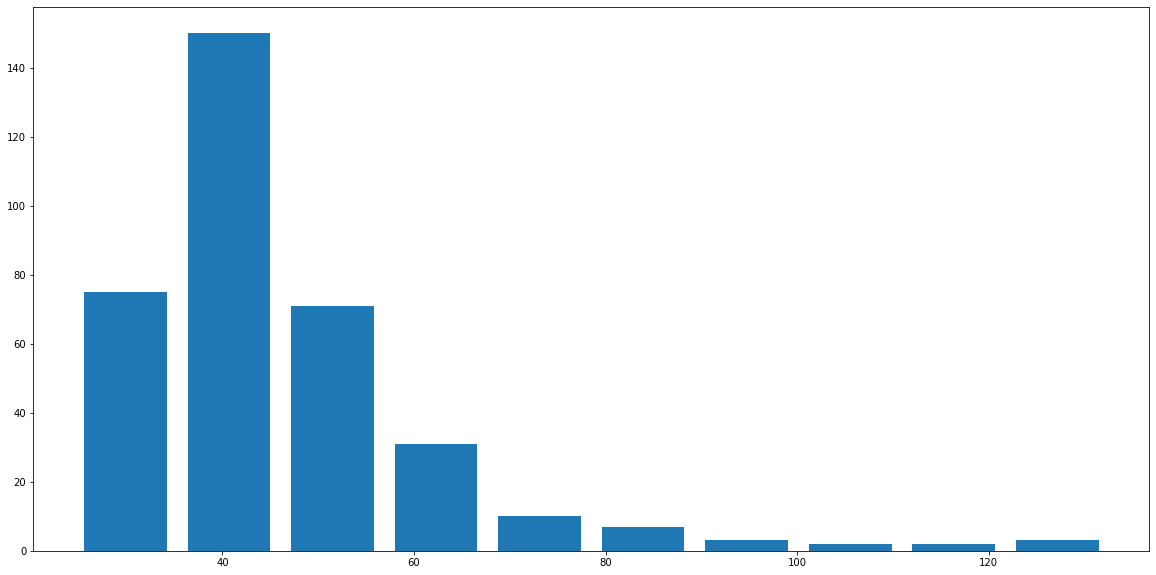

In [24]:
plt.hist(df7.total_income_per_loan_amt,rwidth=0.8)
plt.show()

In [25]:
#this is kinda a normal distribution,pretty good

In [51]:
#dropping more unccessary columns
df8=df7.drop(['Loan_ID','total_income_per_loan_amt','ApplicantIncome2',
            'LoanAmount2','CoapplicantIncome2', 'total_income_per_loan_amt2'],axis=1)
df8.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Total_Income
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,Rural,N,6091.0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y,3000.0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y,4941.0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,Urban,Y,6000.0
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,Y,9613.0


In [52]:
df8['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [53]:
#converting categorical data columns to numerical data
df8=df8.replace(['Yes','No'],[1,0])

In [54]:
df8=df8.replace(['Graduate','Not Graduate'],[1,0])
df8=df8.replace(['Male','Female'],[1,0])
df9=df8.replace(['N','Y'],[1,0])
df9.sample(3)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Total_Income
267,1,1,1,0,4333,1811.0,160.0,360.0,Urban,0,6144.0
347,1,1,0,0,3083,2168.0,126.0,360.0,Urban,0,5251.0
186,1,1,1,1,2178,0.0,66.0,300.0,Rural,1,2178.0


In [55]:
df9['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [56]:
from sklearn.preprocessing import LabelEncoder
le_property=LabelEncoder()
df9.Property_Area=le_property.fit_transform(df9.Property_Area)
df9.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Total_Income
1,1,1,1,0,4583,1508.0,128.0,360.0,0,1,6091.0
2,1,1,1,1,3000,0.0,66.0,360.0,2,0,3000.0
3,1,1,0,0,2583,2358.0,120.0,360.0,2,0,4941.0
4,1,0,1,0,6000,0.0,141.0,360.0,2,0,6000.0
5,1,1,1,1,5417,4196.0,267.0,360.0,2,0,9613.0


In [57]:
df9['ApplicantIncome']=df9['ApplicantIncome']/10000
df9['CoapplicantIncome']=df9['CoapplicantIncome']/10000
df9['LoanAmount']=df9['LoanAmount']/1000
df9['Loan_Amount_Term']=df9['Loan_Amount_Term']/1000

In [58]:
df9.dtypes

Gender                 int64
Married                int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Property_Area          int32
Loan_Status            int64
Total_Income         float64
dtype: object

In [60]:
# df9.Gender=pd.to_numeric(df9.Gender).astype('float64')
# df9.Married=pd.to_numeric(df9.Married).astype('float64')
# df9.Education=pd.to_numeric(df9.Education).astype('float64')
# df9.Self_Employed=pd.to_numeric(df9.Self_Employed).astype('float64')
# df9.ApplicantIncome=pd.to_numeric(df9.ApplicantIncome).astype('float64')
# df9.Property_Area=pd.to_numeric(df9.Property_Area).astype('float64')
# df9.Loan_Status=pd.to_numeric(df9.Loan_Status).astype('float64')
# df9.head(2)


df9.Total_Income=pd.to_numeric(df9.Total_Income).astype('int64')
df9.Property_Area=pd.to_numeric(df9.Property_Area).astype('int64')
df9.LoanAmount=pd.to_numeric(df9.LoanAmount).astype('int64')
df9.ApplicantIncome=pd.to_numeric(df9.ApplicantIncome).astype('int64')
df9.CoapplicantIncome=pd.to_numeric(df9.CoapplicantIncome).astype('int64')
df9.Loan_Amount_Term=pd.to_numeric(df9.Loan_Amount_Term).astype('int64')
df9.dtypes

Gender               int64
Married              int64
Education            int64
Self_Employed        int64
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Property_Area        int64
Loan_Status          int64
Total_Income         int64
dtype: object

In [61]:
df9.Loan_Status.unique()

array([1, 0], dtype=int64)

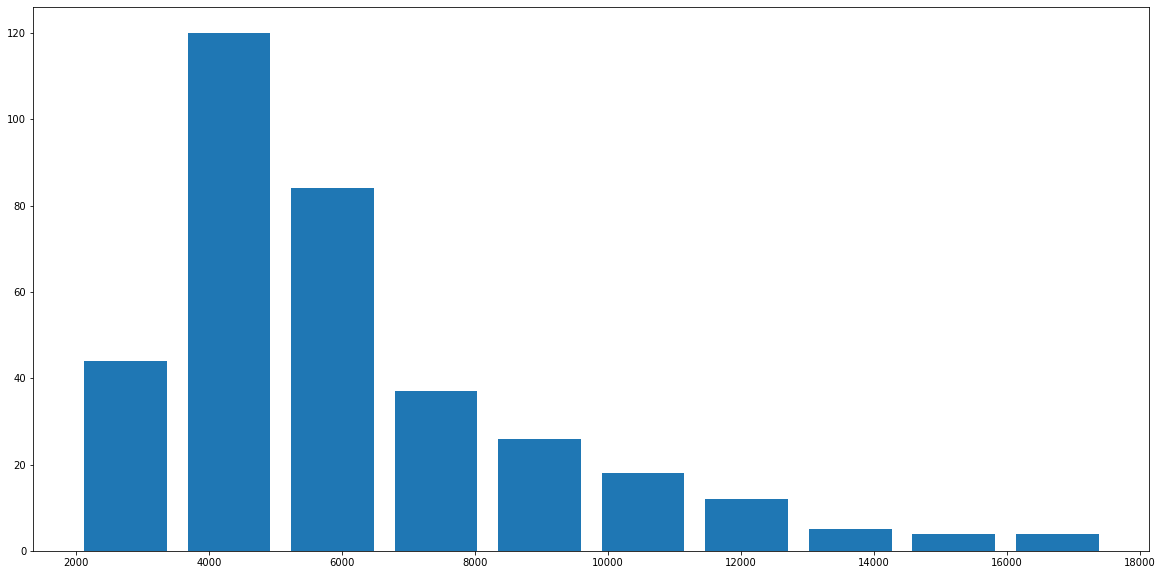

In [63]:
plt.hist(df9.Total_Income,rwidth=0.8)
plt.show()

In [64]:
X=df9.drop('Total_Income',axis='columns')
X.shape

(354, 10)

In [65]:
y=df9.Total_Income
y.sample(3)

178    3750
59     6216
429    2717
Name: Total_Income, dtype: int64

In [66]:
#spliting the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [67]:
X_train.shape

(283, 10)

In [68]:
len(X_test)

71

In [69]:
#using machine learning algorithms to create a model
##creating a machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [70]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        }
    }

#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [71]:
find_best_model_using_gridsearchcv(X_train,y_train)

,model,best_score,best_params
0,linear_regression,0.422991,{'normalize': False}
1,lasso,0.422949,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.257103,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,svm,0.000000,"{'C': 1, 'kernel': 'linear'}"
4,random_forest,0.000000,{}
5,logistic_regression,0.000000,{}


In [73]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [74]:
model.score(X_test,y_test)

0.4260311035352693

In [75]:
#now i can use the model to do predictions
y_predicted=model.predict(X_test)
y_predicted[:10]

array([6437.87346569, 5629.80752928, 4913.92475843, 5836.63506277,
       5836.63506277, 6274.75160055, 4835.13881747, 6481.57913404,
       6137.25426423, 6137.25426423])

In [76]:
y_test[:10]

441    9734
154    3254
263    7200
84     3988
249    3677
431    6500
311    5332
452    5681
274    3900
87     4618
Name: Total_Income, dtype: int64